#                                     CREDIT CARD FRAUD DETECTION

# PROBLEM STATEMENT:-

The Credit Card Fraud Detection Problem includes modeling past credit card transactions with the knowledge of the ones that turned out to be a fraud. This model is then used to identify whether a new transaction is fraudulent or not.

In [1]:
#Importing various Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#checking for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### OBSERVATION
The Columns does not contain any null values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
#checking The count of Class
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

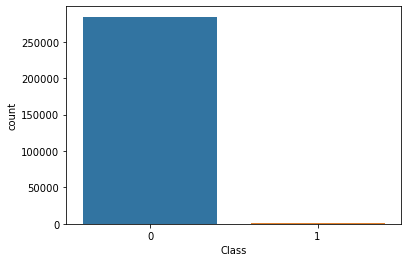

In [8]:
#Visulazing The count of class
sns.countplot(x='Class',data=df)

#### OBSERVATION:-

So, this is an imbalanced Dataset as the count of 0 is far more than count of 1

Here,

0 ---------> NORMAL TRANSACTION

1 ---------> FRAUD TRANSACTION

In [9]:
#Seperating the normal and fraud transaction
normal=df[df['Class']==0]
fraud=df[df['Class']==1]

In [10]:
normal.shape

(284315, 31)

In [11]:
normal.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
normal['Class'].value_counts()

0    284315
Name: Class, dtype: int64

In [13]:
normal['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
fraud.shape

(492, 31)

In [15]:
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [16]:
fraud['Class'].value_counts()

1    492
Name: Class, dtype: int64

In [17]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [18]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Making the imbalaced dataset into Balanced dataset

In [19]:
normal_sample=normal.sample(n=492)

In [20]:
normal_sample.shape

(492, 31)

In [21]:
#Combing the normal_sample and fraud dataset
final_df=pd.concat([normal_sample,fraud],axis=0)

In [22]:
final_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
207136,136533.0,-0.504581,-0.419880,-0.894494,-0.846828,0.295421,1.056747,2.694927,-0.745768,0.540055,...,-0.174123,0.565363,0.256417,-0.961125,-2.323466,-0.134837,0.169318,-0.314634,425.28,0
46223,42691.0,-0.800999,-0.332275,2.601310,1.205719,-1.566212,0.937823,0.171286,0.204082,-1.191730,...,-0.293939,-0.392692,0.399190,0.365661,0.023805,-0.169209,0.134433,0.121782,209.33,0
241186,150917.0,-1.247293,-1.947491,0.342750,0.126173,-1.799517,2.169759,1.879940,0.297918,0.902814,...,0.552534,0.631384,1.681010,0.014691,-0.899402,-0.502508,0.085387,0.317694,698.39,0
95916,65528.0,-0.311231,0.870708,1.315202,-0.140421,0.354089,-0.477889,0.743397,-0.081733,-0.375978,...,-0.285786,-0.672504,-0.074280,-0.068314,-0.192848,0.048518,0.069267,-0.138358,9.87,0
48728,43759.0,-3.365708,1.428471,1.628991,2.999077,-1.064971,0.318721,-0.616117,0.398234,0.047268,...,0.094439,0.620222,0.215282,0.401065,0.172400,0.268639,-1.633495,0.172558,15.17,0


In [23]:
final_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

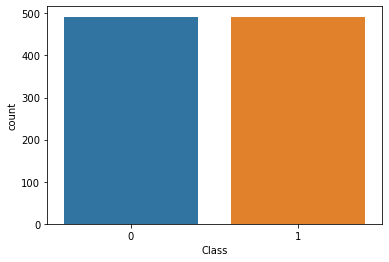

In [24]:
sns.countplot('Class',data=final_df)

In [25]:
# Checking for the statistical data of actual orginal imbalaced dataset and resampled balanced dataset

In [26]:
final_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96673.660569,-0.149212,-0.093755,0.040230,-0.069729,0.141891,-0.040946,0.005720,-0.022782,-0.007134,...,-0.003701,0.020127,-0.005933,-0.030255,0.019565,-0.004916,0.001576,0.002051,0.012482,92.617236
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [27]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


#### OBSERVATION
The statistical data of both the datasets are same so now we as we have made the imbalaced dataset into balaced Dataset,
so we can proceed for the model creation

# MODEL CREATION

# 1.LOGISTIC REGRESSION

In [28]:
# Segregetting the independent and dependent columns
x=final_df.drop(columns='Class')
y=final_df['Class']

In [29]:
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
207136,136533.0,-0.504581,-0.419880,-0.894494,-0.846828,0.295421,1.056747,2.694927,-0.745768,0.540055,...,-0.737738,-0.174123,0.565363,0.256417,-0.961125,-2.323466,-0.134837,0.169318,-0.314634,425.28
46223,42691.0,-0.800999,-0.332275,2.601310,1.205719,-1.566212,0.937823,0.171286,0.204082,-1.191730,...,0.221161,-0.293939,-0.392692,0.399190,0.365661,0.023805,-0.169209,0.134433,0.121782,209.33
241186,150917.0,-1.247293,-1.947491,0.342750,0.126173,-1.799517,2.169759,1.879940,0.297918,0.902814,...,1.454880,0.552534,0.631384,1.681010,0.014691,-0.899402,-0.502508,0.085387,0.317694,698.39
95916,65528.0,-0.311231,0.870708,1.315202,-0.140421,0.354089,-0.477889,0.743397,-0.081733,-0.375978,...,0.187583,-0.285786,-0.672504,-0.074280,-0.068314,-0.192848,0.048518,0.069267,-0.138358,9.87
48728,43759.0,-3.365708,1.428471,1.628991,2.999077,-1.064971,0.318721,-0.616117,0.398234,0.047268,...,-0.756562,0.094439,0.620222,0.215282,0.401065,0.172400,0.268639,-1.633495,0.172558,15.17


In [30]:
x.shape

(984, 30)

In [31]:
y.head()

207136    0
46223     0
241186    0
95916     0
48728     0
Name: Class, dtype: int64

In [32]:
y.shape

(984,)

In [33]:
#Performing the train test Split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [34]:
#Creating the model
model=LogisticRegression()

In [35]:
model.fit(x_train,y_train)

LogisticRegression()

# ACCURACY CHECK:--

In [36]:
#On Training Data
prediction_train_data=model.predict(x_train)
accuracy_train_data=metrics.accuracy_score(prediction_train_data,y_train)
print('ACCURACY ON TRAINING DATA IS :--',accuracy_train_data)

ACCURACY ON TRAINING DATA IS :-- 0.9415501905972046


In [37]:
#On Testing Data
prediction_test_data=model.predict(x_test)
accuracy_test_data=metrics.accuracy_score(prediction_test_data,y_test)
print('ACCURACY ON TESTING DATA IS :--',accuracy_test_data)

ACCURACY ON TESTING DATA IS :-- 0.949238578680203


In [38]:
#On Training Data
print("THE CONFUSION MATRIX IS " )
print(metrics.confusion_matrix(y_train,prediction_train_data))

THE CONFUSION MATRIX IS 
[[379  12]
 [ 34 362]]


In [39]:
#On Testing Data
print("THE CONFUSION MATRIX IS " )
print(metrics.confusion_matrix(y_test,prediction_test_data))

THE CONFUSION MATRIX IS 
[[100   1]
 [  9  87]]


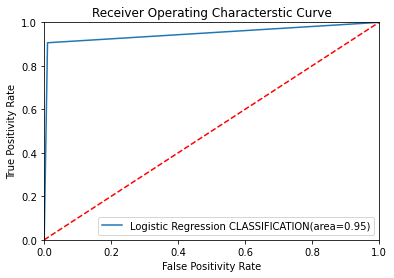

In [40]:
auc=metrics.roc_auc_score(y_test,prediction_test_data)
fpr,tpr,thresolds=metrics.roc_curve(y_test,prediction_test_data)
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression CLASSIFICATION(area=%0.2f)'%auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.title('Receiver Operating Characterstic Curve')
plt.legend(loc='lower right')
plt.show()

# 2. KNN

In [41]:
#Performing Train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [42]:
#Creating the model
knc=KNeighborsClassifier(n_neighbors=5)

In [43]:
knc.fit(x_train,y_train)

KNeighborsClassifier()

# ACCURACY CHECK:--

In [44]:
#on training data
prediction_train_data2=model.predict(x_train)
accuracy_train_data2=metrics.accuracy_score(prediction_train_data2,y_train)
print('ACCURACY ON TRAINING DATA IS :--',accuracy_train_data2)

ACCURACY ON TRAINING DATA IS :-- 0.9418604651162791


In [45]:
#on testing data
prediction_test_data2=model.predict(x_test)
accuracy_test_data2=metrics.accuracy_score(prediction_test_data2,y_test)
print('ACCURACY ON TESTING DATA IS :--',accuracy_test_data2)

ACCURACY ON TESTING DATA IS :-- 0.9459459459459459


In [46]:
#On Training Data
print("THE CONFUSION MATRIX IS " )
print(metrics.confusion_matrix(y_train,prediction_train_data2))

THE CONFUSION MATRIX IS 
[[334  11]
 [ 29 314]]


In [47]:
#On Testing Data
print("THE CONFUSION MATRIX IS " )
print(metrics.confusion_matrix(y_test,prediction_test_data2))

THE CONFUSION MATRIX IS 
[[145   2]
 [ 14 135]]


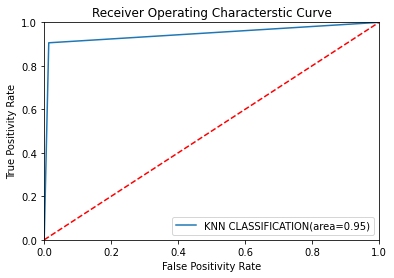

In [48]:
auc=metrics.roc_auc_score(y_test,prediction_test_data2)
fpr,tpr,thresolds=metrics.roc_curve(y_test,prediction_test_data2)
plt.figure()
plt.plot(fpr,tpr,label='KNN CLASSIFICATION(area=%0.2f)'%auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.title('Receiver Operating Characterstic Curve')
plt.legend(loc='lower right')
plt.show()

# 3.RANDOM FOREST

In [49]:
#Performing Train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=101)

In [50]:
#Creating the model
clf=RandomForestClassifier(n_estimators=100)

In [51]:
clf.fit(x_train,y_train)

RandomForestClassifier()

# ACCURACY CHECK:--

In [52]:
#On Training Data
prediction_train_data3=model.predict(x_train)
accuracy_train_data3=metrics.accuracy_score(prediction_train_data3,y_train)
print('ACCURACY ON TRAINING DATA IS :--',accuracy_train_data3)

ACCURACY ON TRAINING DATA IS :-- 0.9417344173441734


In [53]:
#On Testing Data
prediction_test_data3=model.predict(x_test)
accuracy_test_data3=metrics.accuracy_score(prediction_test_data3,y_test)
print('ACCURACY ON TESTING DATA IS :--',accuracy_test_data3)

ACCURACY ON TESTING DATA IS :-- 0.9471544715447154


In [54]:
#On Training Data
print("THE CONFUSION MATRIX IS " )
print(metrics.confusion_matrix(y_train,prediction_train_data3))

THE CONFUSION MATRIX IS 
[[353  11]
 [ 32 342]]


In [55]:
#On Testing Data
print("THE CONFUSION MATRIX IS " )
print(metrics.confusion_matrix(y_test,prediction_test_data3))

THE CONFUSION MATRIX IS 
[[126   2]
 [ 11 107]]


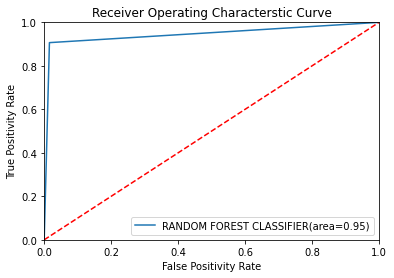

In [56]:
auc=metrics.roc_auc_score(y_test,prediction_test_data3)
fpr,tpr,thresolds=metrics.roc_curve(y_test,prediction_test_data3)
plt.figure()
plt.plot(fpr,tpr,label='RANDOM FOREST CLASSIFIER(area=%0.2f)'%auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.title('Receiver Operating Characterstic Curve')
plt.legend(loc='lower right')
plt.show()

#### CONCLUSION
From the above we can conclude that all the various different models are giving the same accuracy for both
the training data and testing data. 
So, we can use any of the model for the classification problem.
